# ⭐AIFFEL 대전 1기 Exploration 11. GAN⭐
>  프로젝트 소개: 이미지 생성자, 판별자에 대해 알아보고 새로운 이미지를 생성

***

# 🎯 프로젝트 목표
* GAN에 대해 알아보자  
* 생성자, 판별자 모델 구현  
* 이미지 생성과 개선

***

# ✅프로젝트 순서
## 0. 개념 정리
## 1. 데이터셋 구성하기
## 2. 생성자 모델 구현
## 3. 판별자 모델 구현하기
## 4. 손실함수와 최적화 함수
## 5. 훈련 과정 상세 기능 구현하기
## 6. 학습 모델 생성
## 7. 학습 시작
## 8. GAN 훈련 과정 개선하기
## 9. 회고
- 9-1. 루브릭 평가  
- 9-2. 회고

***

# 0. 개념 정리
## 1) 생성 모델링 (Generative Modeling)
- 없던 데이터를 만들어 내는 모델링 기법  
- 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델  
- 생성 모델 예시: 베토벤 음악 학습 후 비슷한 음악 작곡, 글을 생성하는 하는 모델을 학습 후 기사 또는 소설 작성 등  

## 2) 판별 모델링(Discriminative Modeling)
- 입력받은 데이터를 어떤 기준에 대해 판별하는 것이 목표인 모델링  
- 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞추는 모델  
- 가위, 바위, 보 판별하는 모델  

## 3) AWS의 DeepComposer
- AWS에서 개발한 인공지능 작곡 프로그램
- [영상 보기](https://youtu.be/XH2EbK9dQlg)  

#### &nbsp; Q1. 영상의 초반부에 소개된, 생성 모델로 기존의 디자인을 개선한 예 세 가지는 무엇인가요?
- 안테나의 구조, 우주 탐사선, 모형 치아  

#### &nbsp; Q2. DeepComposer의 생성자(Generator)와 판별자(Discriminator)는 각각 무엇에 비유되었나요? 그 비유의 의미는 무엇인가요?
- 생성자가 오케스트라처럼 직접 음악을 연주하여 만들어내는 모델이라면, 판별자는 오케스트라가 연주한 음악을 평가하여 오케스트라가 만들어 내는 음악이 점점 더 좋아지게 만드는 지휘자의 역할을 하는 모델이라는 의미입니다.  

## 4) pix2pix
- 한 이미지를 다른 이미지로 픽셀 단위로 변환  
아래의 예시를 보자.  
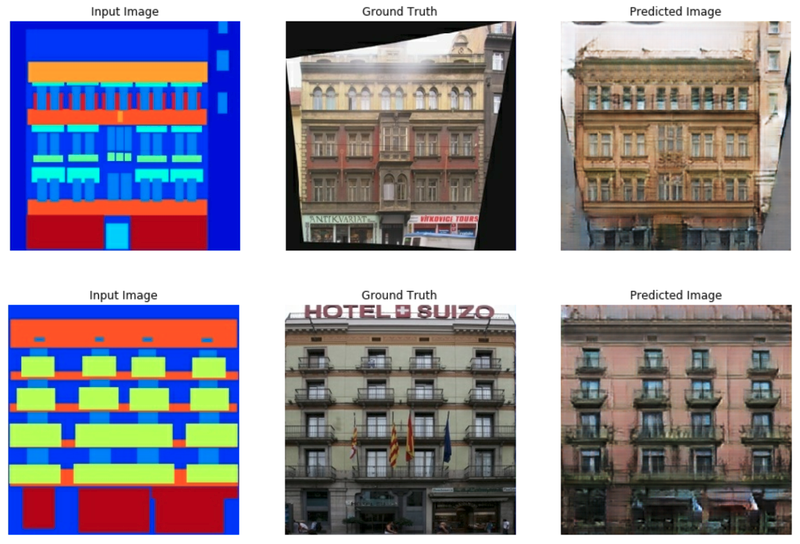

- 활용 예시: 스케치로 그려진 그림을 실사화하기, 흑백 사진을 컬러로 변환하기, 위성사진을 지도 이미지로 변환하기, 낮에 찍힌 사진을 밤 배경의 사진으로 변환하기  

## 5) CycleGAN
- 한 이미지와 다른 이미지를 번갈아 가며 Cyclic하게 변환  
- 한 방향으로의 변환만 가능한 Pix2Pix와 달리 CycleGAN은 **양방향으로의 이미지 변환이 가능**  
- 실사 이미지를 그림으로 바꾸는 것과 그림을 실사 이미지로 바꾸는 것 두 가지가 모두 가능  
- 그림과 사진의 쌍으로 이루어진 데이터셋이 필요했던 Pix2Pix와 달리, CycleGAN은 쌍이 필요 없다.  
&nbsp; 예시1: 얼룩말을 그냥 말로, 말을 얼룩말로 서로 변환할 경우 쌍을 이루지 않더라도 **그냥 얼룩말이 있는 사진과 말이 있는 사진 각각의 데이터셋만 있다면 CycleGAN을 학습가능**  
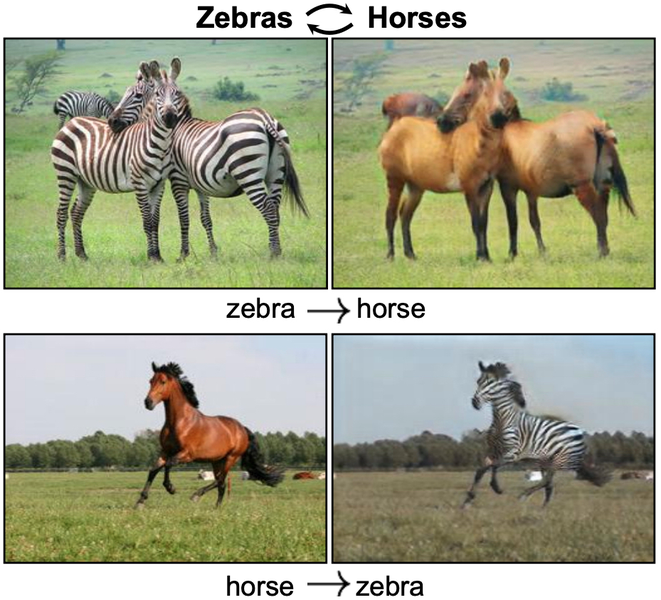
⭐ 딥러닝에서 쌍으로 된 데이터가 필요 없다는 것은 **데이터를 구하기 훨씬 쉽고, 라벨을 붙이는 주석(annotation) 비용이 필요 없다!**  

&nbsp; 예시2: 실제 사진을 모네 또는 고흐 같은 화가가 그린 그림처럼 바꾸는 것(**화풍 바꾸기**)  
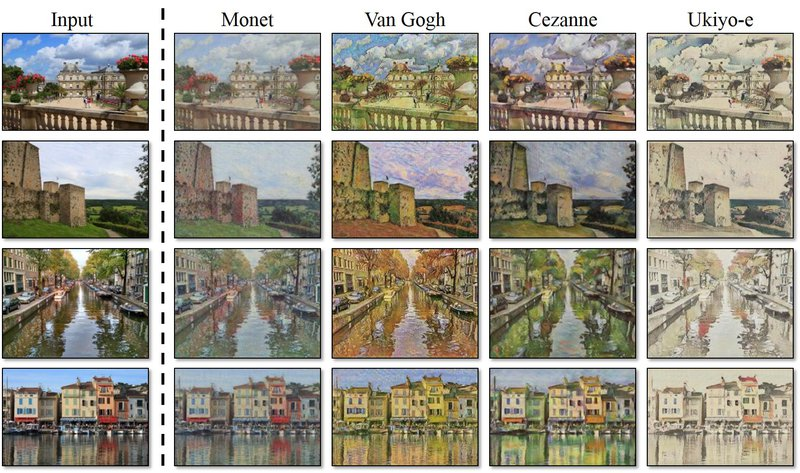

## 6) Neural Style Transfer
- 사진에 내가 원하는 스타일을 입힐 수 있다.  
- 예시  
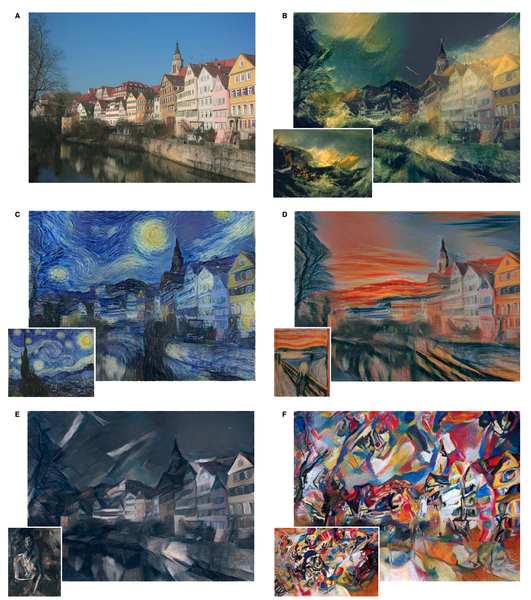

## 7) Fashion MNIST
- MNIST 패션 데이터셋  
&nbsp; (1) 이미지의 크기: 28*\28  
&nbsp; (2) 개수: 훈련 60,000장, 시험 10,000장  
&nbsp; (3) 만들어진 이유: MNIST 너무 쉽다. MNIST 너무 많이 사용됐다. MNIST가 최근의 컴퓨터 비전 문제에 적용될 수 없다.  
&nbsp; (4) 카테고리: 총 10개이며 0~9로 표현됨.  

## 8) GAN (Generative Adversarial Network)
- 2014년 Ian Goodfellow라는 연구자에 의해 처음 나온 네트워크  
- 생성 모델 중 하나이다!  
&nbsp; (1) 생성자: 아무 의미 없는 랜덤 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터를 생성(무에서 유를 창조)  
&nbsp; 예시: 위조 지폐를 만드는 팀  
&nbsp; (2) 판별자: 기존에 있던 진짜 이미지와 생성자가 만들어낸 이미지를 입력받아 각 이미지가 Real인지, Fake인지에 대한 판단 정도를 실숫값으로 출력  
&nbsp; 예시: 위조 지폐를 감시하는 경찰  
- 이 둘은 적대적인 관계이며, 위조 지폐팀은 진짜와 비슷하게 만들려고 노력하고 경찰팀은 위조 지폐를 잘 감식하기 위해 노력하는 과정에서 둘 다 성장  
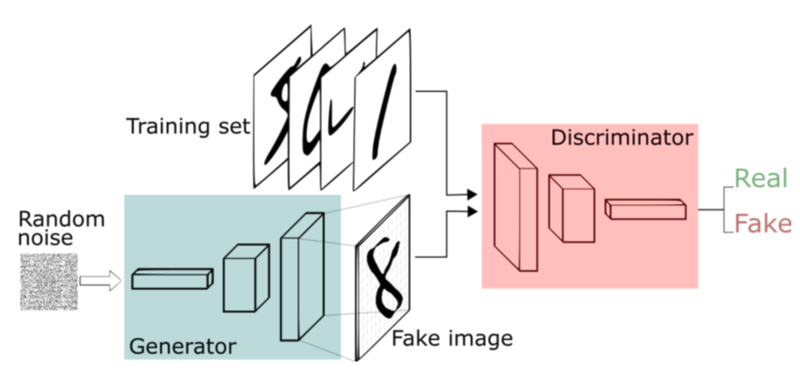

## 9) DCGAN
**GAN 중 특히 합성곱 층(Convolutional Layer)으로 이루어진 딥러닝 모델을 DCGAN (Deep Convolutional GAN)**  
- 입력: 100 random numbers drawn from a uniform distribution (called as a code, or latent variables)  
동일 분포에서 추출한 100개의 난수  
- 출력: 이미지 (64x64x3)  
참고: 다른 생성 모델링 기법: Variational Autoencoders (VAEs), PixelRNN  
[OpenAI의 글 확인하기](https://openai.com/blog/generative-models/)  
[Tensorflow 2.0 Tutorial의 DCGAN 구현](https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko)

# 10) GAN의 손실 함수 최적화 함수
- 교차 엔트로피(Cross Enrtopy)를 사용.  

**교차 엔트로피: 분류 모델에서 많이 사용. 점점 가까워지기 원하는 두 값이 얼마나 큰 차이가 나는지를 정량적으로 계산할 때 많이 쓰임**  

### 특히 판별자는 이미지의 진짜/가짜를 구분해야 하기 때문에 이진 교차 엔트로피(binary cross entropy)를 사용.

- 생성자: 판별값을 입력으로 받고, 가짜 이미지(0)에 대해 진짜 이미지(1)에 가깝게 만들어야 하고  
- 판별자: 판별값을 입력으로 받고, 가짜 이미지(0)는 가짜 이미지 값(0)에 가깝게, 진짜 이미지(1)는 진짜 이미지(1)에 가깝게 만들어야 한다.  



***

# 프로젝트 시작

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 데이터셋 구성하기

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

### 로드한 학습 데이터를 시각화를 통해 확인

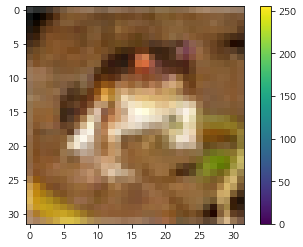

In [3]:
# 한번 첫 번째 데이터를 꺼내서 어떻게 생겼는지 확인해 볼까요?
# plt.imshow((out * 255).astype(np.uint8))
plt.imshow((train_x[0]))
plt.colorbar() # 오른쪽에 각 픽셀의 값과 그에 따른 색도 확인
"""
픽셀에는 우리가 정규화 해준 대로 -1 ~ 1 사이의 값을 가지고, -1이 가장 어두운 검은색, 1이 가장 밝은 흰색을 띤다고 표시
"""
plt.show()

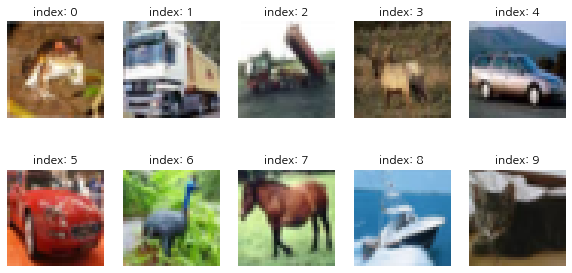

In [4]:
# 여러 개 확인

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1) # plt.subplot(row, col, index)
    plt.imshow(train_x[i])
    plt.title(f'index: {i}')
    plt.axis('off') #  불필요한 축을 지우기
plt.show()

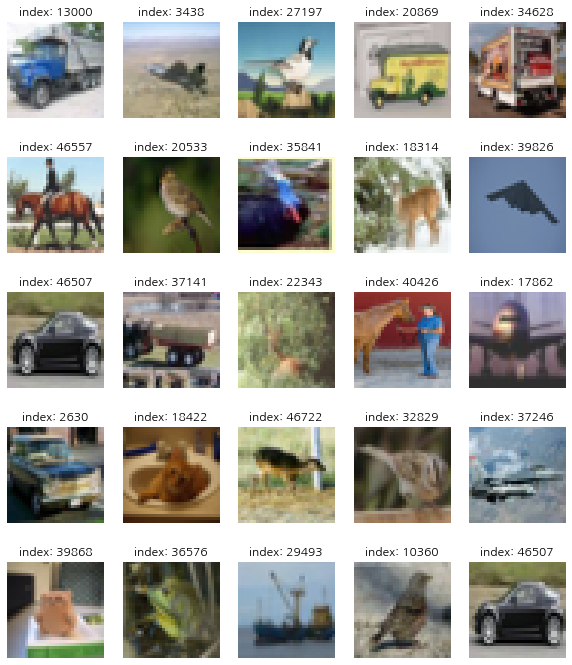

In [5]:
# 이미지 25개를 5*5배열로 랜덤 출력

plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow(train_x[random_index])
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

### 학습에 사용할 `train_x`의 이미지를 [-1, 1]로 정규화

In [6]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [7]:
# 이번 프로젝트에서는 각 픽셀을 -1, 1로 정규화시켜서 사용할 예정이므로, 중간값을 0으로 맞춰주기 위해 중간값을 뺀 후 중간값으로 나눠줍니다.

mid = (train_x.max() + train_x.min()) / 2
train_x = (train_x - mid) / mid # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


### 편하게 사용할 수 있도록 텐서플로우의 Dataset을 이용해 준비

In [8]:
# 전체 데이터셋 개수
train_x.shape[0] + test_x.shape[0]

60000

**`tf.data.Dataset` 모듈의 `from_tensor_slices()` 함수**  
- 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋 생성 가능  
(위 코드는 train_x라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나눔)  
(데이터가 잘 섞이게 하기 위해서는 버퍼 사이즈를 총 데이터 사이즈와 같거나 크게 설정하는 것이 좋다.)

In [9]:
# 모델에 넣어서 학습시켜야 하니, 편하게 사용할 수 있도록 텐서플로우의 Dataset을 이용해 준비
# 우리가 매번 모델에게 직접 섞어서 넣어주지 않아도 됩니다. (shuffle 이용)

BUFFER_SIZE = train_x.shape[0] + test_x.shape[0] # 전체 데이터를 섞기 위해 60,000으로 설정
BATCH_SIZE = 256    # 모델이 한 번에 학습할 데이터의 양 

train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# 2. 생성자 모델 구현

In [10]:
# DCGAN 만들기

def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization()) # 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화
    model.add(layers.LeakyReLU()) # 활성화 함수

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh')) # -1 ~ 1 이내의 값으로 픽셀값을 정규화시켰던 데이터셋과 동일하게 하기 위함

    return model

# def make_generator_model():

#     # Start
#     model = tf.keras.Sequential()

#     # First: Dense layer
#     model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(100,)))
# #     model.add(layers.BatchNormalization()) # 신경망의 가중치가 폭발하지 않도록 가중치 값을 정규화
#     model.add(layers.LeakyReLU()) # 활성화 함수

#     # Second: Reshape layer
#     model.add(layers.Reshape((8, 8, 256)))

#     # Third: Conv2DTranspose layer
#     model.add(layers.Conv2DTranspose(128, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
# #     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     # Fourth: Conv2DTranspose layer
#     model.add(layers.Conv2DTranspose(128, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
# #     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())
    
#     model.add(layers.Conv2DTranspose(64, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
# #     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())
    
#     model.add(layers.Conv2DTranspose(64, kernel_size=(4, 4), strides=(1, 1), padding='same', use_bias=False))
# #     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     # Fifth: Conv2DTranspose layer
#     model.add(layers.Conv2DTranspose(3, kernel_size=(2, 2), padding='same', use_bias=False, \
#                                      activation='tanh')) # -1 ~ 1 이내의 값으로 픽셀값을 정규화시켰던 데이터셋과 동일하게 하기 위함

#     return model

In [11]:
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

### 랜덤 노이즈 생성 (shape = (1,100))
- 아직 모델이 학습되지 않았으니, 아마 결과물도 큰 의미가 있지는 않을 것  
- `tf.random.normal`을 이용하면 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 노이즈 벡터 생성 가능  
- 지금은 학습하는 중이 아니니 `training=False`를 설정  
Batch Normalization 레이어는 훈련 시기와 추론(infernce) 시기의 행동이 다르기 때문에 training=False을 주어야 올바른 결과를 얻을 

In [12]:
noise = tf.random.normal([1, 100])

generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

**`matplotlib` 라이브러리는 2차원 이미지만 보여줄 수 있**으므로 0번째와 3번째 축의 인덱스를 0으로 설정해서 (32, 32) shape의 이미지를 꺼낼 수 있도록 해야 합니다.

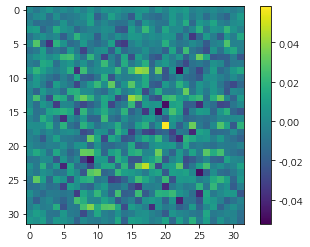

In [13]:
# 시각화, 아직 학습 전이라 노이즈 같은 이미지 생성됨.

plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

# 3. 판별자 모델 구현하기

- 가짜 이미지와 진짜 이미지를 입력받으면 각 이미지 별로 '진짜라고 판단하는 정도'값을 출력해야 한다.  
입력은 (32, 32, 3) 크기의 이미지  
출력은 단 하나의 숫자(진짜라고 판단하는 정도)

In [14]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [15]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

### 판별자 모델에 가짜 이미지 입력

In [16]:
# 아까 생성했던 가짜 이미지를 판별자에 입력
# >> 텐서 형태로 출력. 아직은 아무런 의미가 없는 값

decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00454383]], dtype=float32)>

# 4. 손실함수와 최적화 함수

In [17]:
# tf.keras.losses의 BinaryCrossEntropy 클래스는 기본적으로 본인에게 들어오는 인풋값이 0-1 사이에 분포하는 확률값이라고 가정
# from_logits를 True로 설정해 주어야 BinaryCrossEntropy에 
# 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0~1 사이의 값으로 정규화한 후 알맞게 계산 가능

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### generator_loss
`generator_loss`는 `fake_output`이 1에 가까워지기를 바라므로, 다음과 같이 `tf.ones_like`와의 교차 엔트로피값을 계산하면 됩니다.  
즉, `cross_entropy(tf.ones_like(fake_output), fake_output)` 값은 **fake_output이 (Real Image를 의미하는) 1에 가까울수록 작은 값을 가짐**

In [18]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

### discriminator_loss
`real_output` 값은 1에 가까워지기를, `fake_output` 값은 0에 가까워지기를 바라므로, 두 가지 loss값을 모두 계산합니다. `real_output`은 1로 채워진 벡터와, `fake_output`은 0으로 채워진 벡터와 비교하면 되겠죠!

최종 `discriminator_loss` 값은 이 둘을 더한 값

In [19]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### discriminator accuracy
**판별자가 real output, fake output을 얼마나 정확히 판별하는지의 accuracy를 계산**  
real accuracy와 fake accuracy는 초반에는 1.0에 가깝게 나오다가, 서서히 낮아져서 둘 다 0.5에 가까워지는 것이 이상적  
판별자가 real accuracy, fak accuracy를 1.0으로 예측하면 좋나? 아니다. 생성자가 제대로 만들고 있지 못함.  

ex.) real_output = tf.Tensor([0.2, 0.4, 0.7, 0.9]) 라면,  

(1) tf.math.greater_equal(real_output, tf.constant([0.5]) : real_output의 각 원소가 0.5 이상인지 True, False로 판별  
`>> tf.Tensor([False, False, True, True])`  
(2) tf.cast( (1), tf.float32) : (1)의 결과가 True이면 1.0, False이면 0.0으로 변환  
`>> tf.Tensor([0.0, 0.0, 1.0, 1.0])`  
(3) tf.reduce_mean( (2)) : (2)의 결과를 평균내어 이번 배치의 정확도(accuracy)를 계산  
`>> 0.5`

In [20]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

### 최적화 함수 설정
- Optimizer 설정: **Adam**

In [21]:
# 최적화 함수 설정

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0006)

In [22]:
# 매번 학습이 어떻게 진행되어가고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인
# 샘플은 한 번에 16장
# 생성할 샘플은 매번 같은 노이즈로 생성해야 그에 대한 진전 과정을 확인할 수 있으므로, 고정된 seed 노이즈 생성
# 즉, 100차원의 노이즈를 총 16개, (16, 100) 형상의 벡터를 만들어 두도록.

noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

# 5. 훈련 과정 상세 기능 구현하기
### 1개 미니배치의 훈련 과정을 처리하는 `train_step()` 함수 구현

In [23]:
@tf.function
def train_step(images):  #(1) 입력데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음
    #(2) 생성자 입력 노이즈: generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  
    # (3) tf.GradientTape() 오픈 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # (4) generated_images 생성: generator가 noise를 입력받은 후 generated_images 생성
        generated_images = generator(noise, training=True)  

        #(5) discriminator 판별: discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후
        # real_output, fake_output 출력
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산: fake_output, real_output으로 generator와 discriminator 각각의 loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산: fake_output, real_output으로 정확도 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산: gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습: 계산된 gradient를 optimizer에 입력해 가중치 갱신
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값: 이번 스텝에 계산된 loss와 accuracy를 리턴
    # 이러한 일련의 과정을 통해 한 번의 train_step이 끝나게 됩니다. 

### 16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 
### `generate_and_save_images()`함수 구현

In [24]:
# 그러면, 이렇게 한 단계씩 학습할 train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수를 만들어 보죠.
# 아까 만들어 놓았던 고정된 seed를 이용해서 결과물을 만들어내므로, 고정된 seed에 대한 결과물이 얼마나 나아지고 있는지를 확인할 수 있습니다.

def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(((predictions[i].numpy()*127.5)+127.5).astype(np.int))
        # plt.imshow((out * 255).astype(np.uint8))
#         np_generated = np_generated.astype(int)
    # np_generated = generated_image.numpy()
    # np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
    # np_generated = np_generated.astype(int)
        plt.axis('off')

    plt.savefig('{}/1.AIFFEL_Study/Exploration/E12_GAN/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

### 훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 
### 그래프로 시각화하는 `draw_train_history()` 함수를 구현

In [25]:
# train_step() 함수가 리턴하는 gen_loss, disc_loss, real_accuracy, fake_accuracy 이상 4가지 값을 history라는 dict 구조에 
# 리스트로 저장하고 있다가 매 epoch마다 시각화하는 함수를 만들어 봅시다. 
# 예를 들어 생성자의 loss의 history는 history['gen_loss']로 접근할 수 있는 list로 관리할 예정입니다.

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/1.AIFFEL_Study/Exploration/E12_GAN/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

### `tf.train.Checkpoint` 설정
`tf.train.Checkpoint`를 활용하면 매번 모델을 직접 저장해주지 않아도, 코드 한 줄로 빠르고 편하게 버전 관리  
checkpoint에는 optimizer와 생성자, 구분자를 모두 넣어 저장합니다. 정확히는 생성자와 구분자가 학습한 모델 가중치를 저장

In [26]:
checkpoint_dir = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E12_GAN/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# 6. 학습 모델 생성
#### 한 단계를 학습하는 `train_step()`
#### 샘플 이미지를 생성하고 저장하는 `generate_and_save_images()`
#### 학습 과정을 시각화하는 `draw_train_history()`
#### 모델까지 저장하기 위한 `checkpoint`

In [27]:
# 위 4개를 하나로 합침.

def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

모델을 저장하는 간격을 담당하는 `save_every`와 전체 학습 에포크를 결정하는 `EPOCHS` 파라미터도 설정해준 후 훈련

In [30]:
save_every = 5
EPOCHS = 100 # 에폭

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 7. 학습 시작

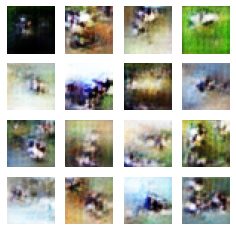

Time for training : 1201 sec


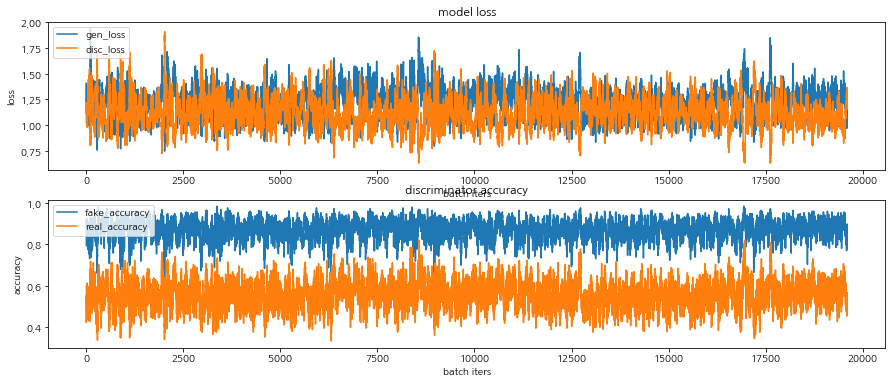

CPU times: user 20min 4s, sys: 42.2 s, total: 20min 46s
Wall time: 20min 2s


In [33]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

### checkpoint 모듈을 활용하여 모델을 로드 예시

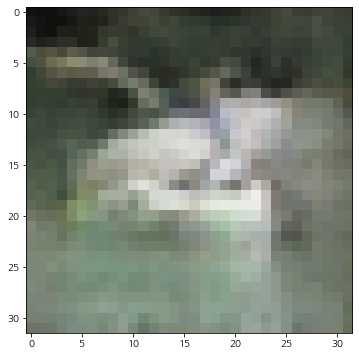

In [78]:
checkpoint_dir = os.getenv('HOME')+'/aiffel-dj40/1.AIFFEL_Study/Exploration/E12_GAN/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

### checkpoint에서 학습된 모델 불러와서 추가 학습 진행

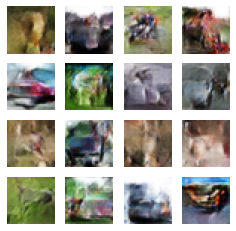

Time for training : 6655 sec


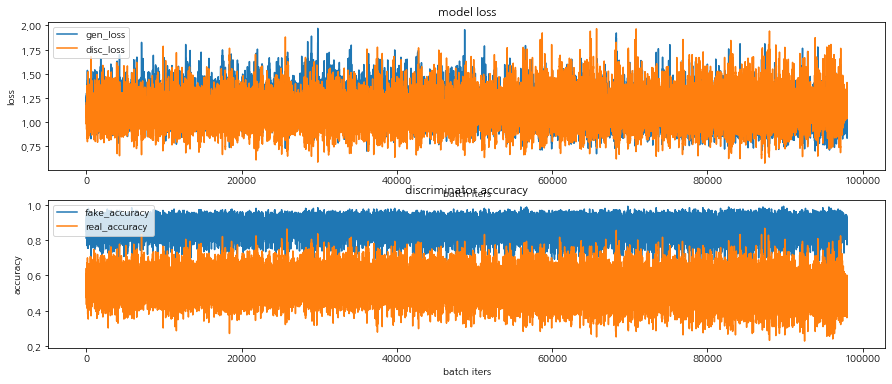

CPU times: user 1h 50min 32s, sys: 3min 43s, total: 1h 54min 16s
Wall time: 1h 50min 59s


In [76]:
# %%time
# # train(train_dataset, EPOCHS, save_every)
# train(train_dataset, 500, save_every)

### 생성된 이미지 gif 이미지 만들기

In [34]:
anim_file = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E12_GAN/cifar_10_epochs=100_final_1_7.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/1.AIFFEL_Study/Exploration/E12_GAN/cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/1.AIFFEL_Study/Exploration/E12_GAN/cifar_10_epochs=100_final_1_7.gif

-rw-rw-r-- 1 aiffel-dj40 aiffel-dj40 3930040  3월  2 21:31 '/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E12_GAN/cifar_10_epochs=100_final_1_7.gif'


**완성된 gif 파일 보기(epochs=50) 흑백 기준**  
![cifar10_epochs=50.gif](cifar_10_epochs=50.gif)

**완성된 gif 파일 보기(epochs=100) 흑백 기준**  
![cifar10_epochs=100.gif](cifar_10_epochs=100.gif)

**완성된 gif 파일 보기(epochs=500) 흑백 기준**  
![cifar10_epochs=500.gif](cifar_10_epochs=100.gif)

**완성된 gif 파일 보기(epochs=1000) 흑백 기준**  
![cifar10_epochs=1000.gif](cifar_10_epochs=1000.gif)

**완성된 gif 파일 보기(epochs=600), 컬러로 변경하고 체크포인트 제거 후 다시 시작**  
![cifar_10_epochs=600.gif](cifar_10_epochs=600.gif)

**완성된 gif 파일 보기(epochs=1000), 컬러(판별자 학습률: 0.0001 -> 0.0004)**  
![cifar_10_epochs=1100_lr_change.gif](cifar_10_epochs=1100_lr_change.gif)

# 8. GAN 훈련 과정 개선하기
- 생성된 샘플 이미지, 학습 과정 그래프 등을 통해 이전 훈련 과정의 문제점을 분석  
- 모델구조 또는 학습 과정을 개선한 내역과 그 결과(샘플 이미지, 학습 과정 그래프 포함)를 함께 제출

https://github.com/soumith/ganhacks  
https://towardsdatascience.com/10-lessons-i-learned-training-generative-adversarial-networks-gans-for-a-year-c9071159628  
https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/  
https://papers.nips.cc/paper/6125-improved-techniques-for-training-gans.pdf

### 다양한 방법들이 제시되는 데 간략하게 정리하면 아래와 같다.  
1. Early Stopping  
- 오버피팅이 되지 않게 방지하는 기법이지만 GAN에서는 크게 의미가 없다.  

2. 손실함수 채택  
- 크게 상관이 없다.  

**3. 학습률 변환**  
**- 생성자는 0.0001, 판별자는 0.0004(생성자는 치밀하게 생성, 판별자는 대략 검토하는 느낌으로 진행되는 느낌)**  

4. 입력 정규화  
- 이미 -1 ~ 1 사이로 정규화 진행함.  

5. Batch Norm  
- 생성자 layer에서 적용함.  

6. LeakyReLU 사용
- 사용함.  

7. Adam optimizer  
- 사용함.

다양하게 제시되는 방법들 중 대다수는 이미 적용 중이다.    
그래서 학습률 변화에 따른 accuracy 비교를 해볼 예정.  

### 1. 생성자 학습률: 0.0001, 판별자 학습률: 0.0001, epochs=100  


**생성자 학습률: 0.0001, 판별자 학습률: 0.0001, epochs=100**  
![cifar_10_epochs=100_final_1_1.gif](cifar_10_epochs=100_final_1_1.gif)

**그래프**  
![graph_1](lr_1_1_epochs=100.png)

### 2. 생성자 학습률: 0.0001, 판별자 학습률: 0.0006, epochs=100  


**생성자 학습률: 0.0001, 판별자 학습률: 0.0006, epochs=100**
![cifar_10_epochs=100_final_1_6.gif](cifar_10_epochs=100_final_1_6.gif)

**그래프**  
![graph_2](lr_1_6_epochs=100.png)

***

# 9. 회고
## 9-1. 루브릭 평가
### 1. GAN의 두 모델 구조를 통해 이미지를 성공적으로 생성하였다.
(오브젝트 종류를 육안으로 구별할 수 있을 만한 이미지를 생성하였다)  
- 흐릿하지만 외곽선을 통해 구분할 수 있게 되었다.  


### 2. 생성 이미지 시각화 및 학습 그래프를 통해 GAN 학습이 바르게 진행되었음을 입증하였다.
(gif를 통해 생성이미지 품질이 서서히 향상되는 것과, fake accuracy가 추세적으로 0.5를 향해 하향하고 있음을 확인하였다.)  
- gif 생성이미지를 통해 품질이 서서히 향상됨 확인. fake accuracy는 미세하게 하향 중  


### 3. 추가적인 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 이를 적용하였다.
(제출 아이디어를 제출 프로젝트에 반영하고, 그 결과가 아이디어 적용 이전보다 향상되었음을 시각적으로 입증하였다.)  
- 학습률 변경을 통해 그래프를 확인해보면 loss와 real_accuracy가 개선됨을 확인.

## 9-2. 회고
1. 이미지 끝판왕이라고 하는 GAN을 시작했다.!  
2. 생성자와 판별자의 관계를 학습했다.  
3. 노드 진행은 크게 어렵지 않았으나 기대보다는 낮은 이미지 생성이 되었다.  
4. 하지만 이것은 cifar-10의 원본 이미지의 크기가 매우 작기 때문이라고 생각한다.  
5. 또한 accuracy의 경우 0.5로 수렴하는 것이 이상적이나 실제는 0.7 수준으로 수렴된다고 한다.  
6. 기본 모델을 개선하기 위해 다양한 방법들을 시도하려고 했으나 이미 적용 중인 상태였기 때문에 학습률을 조정해 개선을 시도했다.  
7. 이미지 생성에서는 크게 구분이 잘 되지 않았지만 그래프에서 차이가 보였다.  
8. 기회가 된다면 큰 사이즈의 이미지를 이용해 진행하고 싶다.  
9. 코드 진행 시 이미지 전처리에 도움을 주신 **`@vg-rlo`**님께 감사함을 드린다.